## Descriptive Statistics for Relational Novelty

Group comparisons for relational novelty, take top 10%, the lower 10%, and the middle and do the average relational novelty ( inverse of highest similarity ). And calculate the following measures for the 3 groups, the average relational novelty, the standard deviation of the relational novelty, the average pairwise similarity ( pairwise measure AMONG each group members ), and the standard deviation of the pairwise similarity.

In [1]:
%store -r stage1_bogota0
%store -r stage1_bogota1
%store -r stage1_bogota2
%store -r stage1_bogota3

%store -r stage2_bogota0
%store -r stage2_bogota1
%store -r stage2_bogota2
%store -r stage2_bogota3

%store -r stage3_bogota0
%store -r stage3_bogota1
%store -r stage3_bogota2
%store -r stage3_bogota3

%store -r stage4_bogota0
%store -r stage4_bogota1
%store -r stage4_bogota2
%store -r stage4_bogota3

In [2]:
stage1_bogota0

,user1,user2,user1_phase,user2_phase,similarity
38,fffeelipe,mnguzmanc,1,2,0.045455
39,fffeelipe,jmcuestasb,1,2,0.100000
40,fffeelipe,katherinsb,1,2,0.000000
41,fffeelipe,jjrodriguezn,1,2,0.081081
42,fffeelipe,DglyP,1,2,0.184211
...,...,...,...,...,...
2141,odprietoh,jdsolanos,1,2,1.000000
2142,odprietoh,jcneivaa,1,2,1.000000
2143,odprietoh,fmbernalb,1,2,1.000000
2144,odprietoh,MogGy94,1,2,1.000000


In [3]:
import pandas as pd 
import seaborn as sns
import math
df = pd.read_csv("merged-sim-best.csv")
df

,Unnamed: 0.1,Unnamed: 0,Student,phase,novelty,group,abs_perform_diff_best,user2,Q7_Q7_1,Q7_Q7_2,...,count,total,user-requirement,infovis,novelty_score,exploration,Group,len_unique,added_sum,sim-to-best
0,0,1,wilson911013,1,0.000000,3,250.84,wilson911013,0.0,1.0,...,1.0,90.83,20.0,33.33,0.0,0.000000,3.0,0.0,0.0,0.000000
1,2,5,lizzyt10h,1,0.400000,3,175.00,lizzyt10h,2.0,1.0,...,7.0,75.00,0.0,0.00,0.0,0.945312,3.0,13.0,6.0,0.125000
2,3,6,AFelipeGA,1,0.400000,3,291.67,AFelipeGA,4.0,3.0,...,3.0,152.50,40.0,37.50,0.0,0.995375,3.0,2059.0,2049.0,0.003841
3,4,7,wapiravaguens,1,0.400000,3,90.00,wapiravaguens,0.0,1.0,...,1.0,192.50,80.0,50.00,0.0,0.567164,3.0,63.0,34.0,0.202532
4,5,8,capinzor,1,0.413793,3,221.67,capinzor,0.0,0.0,...,0.0,120.00,20.0,25.00,0.0,0.000000,3.0,20.0,0.0,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,647,651,kastellanos,3,0.000000,1,345.83,kastellanos,5.0,5.0,...,0.0,0.00,0.0,0.00,0.0,0.000000,1.0,NaN,NaN,NaN
632,648,652,tres-iqus,3,0.000000,2,358.33,tres-iqus,1.0,1.0,...,0.0,0.00,0.0,0.00,0.0,0.000000,2.0,NaN,NaN,NaN
633,649,653,annumumozme,4,0.000000,0,313.33,NaN,NaN,NaN,...,0.0,237.50,40.0,37.50,60.0,0.000000,0.0,NaN,NaN,NaN
634,650,654,kastellanos,4,0.000000,1,350.00,kastellanos,5.0,5.0,...,0.0,0.00,0.0,0.00,0.0,0.000000,1.0,NaN,NaN,NaN


In [4]:
df_g3 = df[df['group'] == 3]
df_g3_p1 = df_g3[df_g3['phase'] == 1]
df_g3_p2 = df_g3[df_g3['phase'] == 2]
df_g3_p3 = df_g3[df_g3['phase'] == 3]
df_g3_p4 = df_g3[df_g3['phase'] == 4]

df_g2 = df[df['group'] == 2]
df_g2_p1 = df_g2[df_g2['phase'] == 1]
df_g2_p2 = df_g2[df_g2['phase'] == 2]
df_g2_p3 = df_g2[df_g2['phase'] == 3]
df_g2_p4 = df_g2[df_g2['phase'] == 4]

df_g1 = df[df['group'] == 1]
df_g1_p1 = df_g1[df_g1['phase'] == 1]
df_g1_p2 = df_g1[df_g1['phase'] == 2]
df_g1_p3 = df_g1[df_g1['phase'] == 3]
df_g1_p4 = df_g1[df_g1['phase'] == 4]

df_g0 = df[df['group'] == 0]
df_g0_p1 = df_g0[df_g0['phase'] == 1]
df_g0_p2 = df_g0[df_g0['phase'] == 2]
df_g0_p3 = df_g0[df_g0['phase'] == 3]
df_g0_p4 = df_g0[df_g0['phase'] == 4]

In [5]:
math.ceil(len(df_g3_p1['novelty']) * 0.1)

4

In [6]:
math.ceil(len(df_g2_p1['novelty']) * 0.1)

5

In [7]:
math.ceil(len(df_g1_p1['novelty']) * 0.1)

5

In [8]:
math.ceil(len(df_g0_p1['novelty']) * 0.1)

4

In [9]:
math.ceil(len(df_g3_p1['novelty']) * 0.55)

21

In [10]:
math.ceil(len(df_g3_p1['novelty']) * 0.65)

25

In [11]:
math.ceil(len(df_g2_p1['novelty']) * 0.55)

24

In [12]:
math.ceil(len(df_g2_p1['novelty']) * 0.65)

28

In [13]:
math.ceil(len(df_g1_p1['novelty']) * 0.55)

23

In [14]:
math.ceil(len(df_g1_p1['novelty']) * 0.65)

27

In [15]:
math.ceil(len(df_g0_p1['novelty']) * 0.55)

22

In [16]:
math.ceil(len(df_g0_p1['novelty']) * 0.65)

26

In [17]:
df_g3_p1 = df_g3_p1.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g3_p2 = df_g3_p2.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g3_p3 = df_g3_p3.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g3_p4 = df_g3_p4.sort_values(['total'], ascending=False).groupby('Student').head(4)

df_g3_p1 = df_g3_p1.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g3_p2 = df_g3_p2.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g3_p3 = df_g3_p3.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g3_p4 = df_g3_p4.sort_values(['total'], ascending=False).groupby('Student').tail(4)

df_g2_p1 = df_g2_p1.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g2_p2 = df_g2_p2.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g2_p3 = df_g2_p3.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g2_p4 = df_g2_p4.sort_values(['total'], ascending=False).groupby('Student').head(4)

df_g2_p1 = df_g2_p1.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g2_p2 = df_g2_p2.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g2_p3 = df_g2_p3.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g2_p4 = df_g2_p4.sort_values(['total'], ascending=False).groupby('Student').tail(4)

df_g1_p1 = df_g1_p1.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g1_p2 = df_g1_p2.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g1_p3 = df_g1_p3.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g1_p4 = df_g1_p4.sort_values(['total'], ascending=False).groupby('Student').head(4)

df_g1_p1 = df_g1_p1.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g1_p2 = df_g1_p2.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g1_p3 = df_g1_p3.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g1_p4 = df_g1_p4.sort_values(['total'], ascending=False).groupby('Student').tail(4)

df_g0_p1 = df_g0_p1.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g0_p2 = df_g0_p2.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g0_p3 = df_g0_p3.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g0_p4 = df_g0_p4.sort_values(['total'], ascending=False).groupby('Student').head(4)

df_g0_p1 = df_g0_p1.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g0_p2 = df_g0_p2.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g0_p3 = df_g0_p3.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g0_p4 = df_g0_p4.sort_values(['total'], ascending=False).groupby('Student').tail(4)


## Top 10% in Group 3

In [18]:
df_list = [df_g3_p1, df_g3_p2, df_g3_p3, df_g3_p4]

top_group3 = []
std_top_group3 = []
for df in df_list:
    topgroup3 = df['novelty'].head(4).describe().loc['mean']
    top_group3.append(topgroup3)
    std_top_group3.append(df['novelty'].head(4).describe().loc['std'])

## Bottom 10% in Group 3

In [19]:
df_list = [df_g3_p1, df_g3_p2, df_g3_p3, df_g3_p4]

bottom_group3 = []
std_group3 = []
for df in df_list:
    bottomgroup3 = df['novelty'].tail(4).describe().loc['mean']
    bottom_group3.append(bottomgroup3)

## Middle in Group 3

In [20]:
df_list = [df_g3_p1, df_g3_p2, df_g3_p3, df_g3_p4]

middle_group3 = []
for df in df_list:
    middlegroup3 = df['novelty'].iloc[[21,25]].describe().loc['mean']
    middle_group3.append(middlegroup3)
print(middle_group3)

[0.646329365079365, 0.5946478220574605, 0.7027863777089784, 0.8446565599850275]


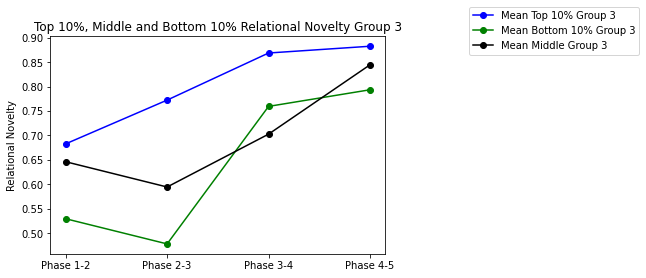

In [21]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, top_group3,'bo-',label='Mean Top 10% Group 3') 
line2 = plt.plot(x_axis, bottom_group3,'go-',label='Mean Bottom 10% Group 3') 
line3 = plt.plot(x_axis, middle_group3,'ko-',label='Mean Middle Group 3')

plt.title("Top 10%, Middle and Bottom 10% Relational Novelty Group 3")
plt.ylabel("Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Top 10% Group 2

In [22]:
df_list = [df_g2_p1, df_g2_p2, df_g2_p3, df_g2_p4]

top_group2 = []
for df in df_list:
    top_group2.append(df['novelty'].head(5).describe().loc['mean'])

## Bottom 10% Group 2

In [23]:
df_list = [df_g2_p1, df_g2_p2, df_g2_p3, df_g2_p4]

bottom_group2 = []
for df in df_list:
    bottom_group2.append(df['novelty'].tail(5).describe().loc['mean'])

## Middle in Group 2

In [24]:
df_list = [df_g2_p1, df_g2_p2, df_g2_p3, df_g2_p4]

middle_group2 = []
for df in df_list:
    middle_group2.append(df[['novelty']].iloc[[24,28]].describe().loc['mean'])

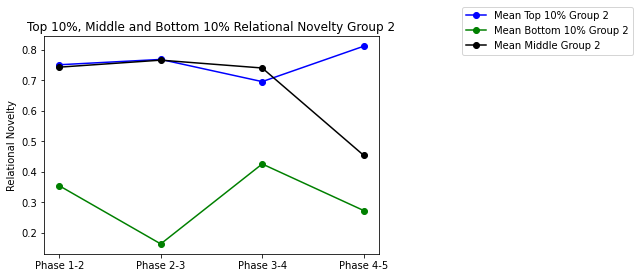

In [25]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, top_group2,'bo-',label='Mean Top 10% Group 2') 
line2 = plt.plot(x_axis, bottom_group2,'go-',label='Mean Bottom 10% Group 2') 
line3 = plt.plot(x_axis, middle_group2,'ko-',label='Mean Middle Group 2')

plt.title("Top 10%, Middle and Bottom 10% Relational Novelty Group 2")
plt.ylabel("Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Top 10% Group 1

In [26]:
df_list = [df_g1_p1, df_g1_p2, df_g1_p3, df_g1_p4]

top_group1 = []
for df in df_list:
    top_group1.append(df['novelty'].head(5).describe().loc['mean'])

## Bottom 10% Group 1

In [27]:
df_list = [df_g1_p1, df_g1_p2, df_g1_p3, df_g1_p4]

bottom_group1 = []
for df in df_list:
    bottom_group1.append(df['novelty'].tail(5).describe().loc['mean'])

## Middle Group 1

In [28]:
df_list = [df_g1_p1, df_g1_p2, df_g1_p3, df_g1_p4]

middle_group1 = []
for df in df_list:
    middle_group1.append(df[['novelty']].iloc[[23,27]].describe().loc['mean'])

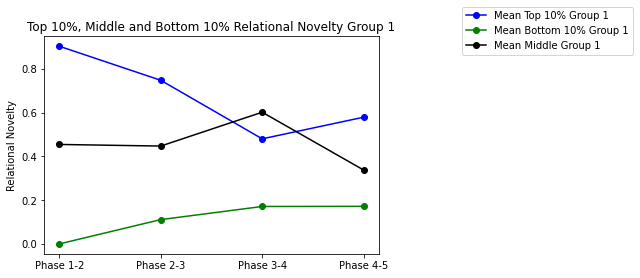

In [29]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, top_group1,'bo-',label='Mean Top 10% Group 1') 
line2 = plt.plot(x_axis, bottom_group1,'go-',label='Mean Bottom 10% Group 1') 
line3 = plt.plot(x_axis, middle_group1,'ko-',label='Mean Middle Group 1')

plt.title("Top 10%, Middle and Bottom 10% Relational Novelty Group 1")
plt.ylabel("Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Top 10% in Group 0

In [30]:
df_list = [df_g0_p1, df_g0_p2, df_g0_p3, df_g0_p4]

top_group0 = []
for df in df_list:
    top_group0.append(df['novelty'].head(4).describe().loc['mean'])

## Bottom 10% in Group 0

In [31]:
df_list = [df_g0_p1, df_g0_p2, df_g0_p3, df_g0_p4]

bottom_group0 = []
for df in df_list:
    bottom_group0.append(df['novelty'].tail(4).describe().loc['mean'])

## Middle Group 0

In [32]:
df_list = [df_g0_p1, df_g0_p2, df_g0_p3, df_g0_p4]

middle_group0 = []
for df in df_list:
    middle_group0.append(df[['novelty']].iloc[[22,26]].describe().loc['mean'])

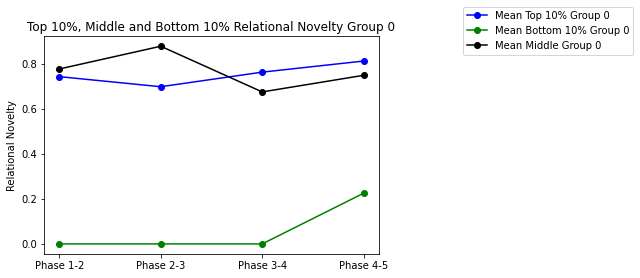

In [33]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, top_group0,'bo-',label='Mean Top 10% Group 0') 
line2 = plt.plot(x_axis, bottom_group0,'go-',label='Mean Bottom 10% Group 0') 
line3 = plt.plot(x_axis, middle_group0,'ko-',label='Mean Middle Group 0')

plt.title("Top 10%, Middle and Bottom 10% Relational Novelty Group 0")
plt.ylabel("Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Top 10%, Middle and Bottom 10% pairwise similarity Group 3

## Stage 1

In [34]:
# four largest values in column age
df_g3_p1_top = df_g3_p1.nlargest(4, ['total'])
df_g3_p1_top = df_g3_p1_top.Student.tolist()
df_g3_p1_top

['dduartec', 'jumcorredorro', 'lgmoralesa', 'jscastelblancoh']

In [35]:
stage1_bogota3_top = stage1_bogota3[stage1_bogota3['user2'].isin(df_g3_p1_top)]
stage1_bogota3_top['similarity'].describe()

count    160.000000
mean       0.102330
std        0.081037
min        0.000000
25%        0.052294
50%        0.091608
75%        0.134615
max        0.375000
Name: similarity, dtype: float64

In [36]:
df_g3_p1_bottom = df_g3_p1.nsmallest(4, ['total'])
df_g3_p1_bottom = df_g3_p1_bottom.Student.tolist()
df_g3_p1_bottom 

['lizzyt10h', 'wilson911013', 'mballeng91', 'NicolasPrr']

In [37]:
stage1_bogota3_bottom = stage1_bogota3[stage1_bogota3['user2'].isin(df_g3_p1_bottom)]
stage1_bogota3_bottom['similarity'].describe()

count    160.000000
mean       0.073027
std        0.146266
min        0.000000
25%        0.000000
50%        0.005556
75%        0.115950
max        1.000000
Name: similarity, dtype: float64

## Stage 2

In [38]:
df_g3_p2_top = df_g3_p2.nlargest(4, ['total'])
df_g3_p2_top = df_g3_p2_top.Student.tolist()
df_g3_p2_top

['jumcorredorro', 'lgmoralesa', 'dduartec', 'jmalvarezd']

In [39]:
stage2_bogota3_top = stage2_bogota3[stage2_bogota3['user2'].isin(df_g3_p2_top)]
stage2_bogota3_top['similarity'].describe()

count    160.000000
mean       0.084622
std        0.071213
min        0.000000
25%        0.032552
50%        0.073269
75%        0.123171
max        0.323529
Name: similarity, dtype: float64

In [40]:
df_g3_p2_bottom = df_g3_p2.nsmallest(4, ['total'])
df_g3_p2_bottom = df_g3_p2_bottom.Student.tolist()
df_g3_p2_bottom 

['wilson911013', 'Chranium', 'mballeng91', 'afceballosr']

In [41]:
stage2_bogota3_bottom = stage2_bogota3[stage2_bogota3['user2'].isin(df_g3_p2_bottom)]
stage2_bogota3_bottom['similarity'].describe()

count    160.000000
mean       0.066766
std        0.163517
min        0.000000
25%        0.000000
50%        0.009113
75%        0.069581
max        1.000000
Name: similarity, dtype: float64

## Stage 3

In [42]:
df_g3_p3_top = df_g3_p3.nlargest(4, ['total'])
df_g3_p3_top = df_g3_p3_top.Student.tolist()
df_g3_p3_top

['juligarji', 'lgmoralesa', 'jscastelblancoh', 'jumcorredorro']

In [43]:
stage3_bogota3_top = stage3_bogota3[stage3_bogota3['user2'].isin(df_g3_p3_top)]
stage3_bogota3_top['similarity'].describe()

count    160.000000
mean       0.046563
std        0.052960
min        0.000000
25%        0.005319
50%        0.031667
75%        0.069754
max        0.320388
Name: similarity, dtype: float64

In [44]:
df_g3_p3_bottom = df_g3_p3.nsmallest(4, ['total'])
df_g3_p3_bottom = df_g3_p3_bottom.Student.tolist()
df_g3_p3_bottom 

['davidh17', 'wilson911013', 'dduartec', 'Chranium']

In [45]:
stage3_bogota3_bottom = stage3_bogota3[stage3_bogota3['user2'].isin(df_g3_p3_bottom)]
stage3_bogota3_bottom['similarity'].describe()

count    160.000000
mean       0.053661
std        0.063086
min        0.000000
25%        0.004758
50%        0.035960
75%        0.079138
max        0.333333
Name: similarity, dtype: float64

## Stage 4

In [46]:
df_g3_p4_top = df_g3_p4.nlargest(4, ['total'])
df_g3_p4_top = df_g3_p4_top.Student.tolist()
df_g3_p4_top

['NicolasPrr', 'jscastelblancoh', 'juligarji', 'lacardenasv']

In [47]:
stage4_bogota3_top = stage4_bogota3[stage4_bogota3['user2'].isin(df_g3_p4_top)]
stage4_bogota3_top['similarity'].describe()

count    160.000000
mean       0.035538
std        0.076227
min        0.000000
25%        0.005600
50%        0.013767
75%        0.050041
max        0.882434
Name: similarity, dtype: float64

In [48]:
df_g3_p4_bottom = df_g3_p4.nsmallest(4, ['total'])
df_g3_p4_bottom = df_g3_p4_bottom.Student.tolist()
df_g3_p4_bottom 

['wilson911013', 'Chranium', 'mballeng91', 'spenas']

In [49]:
stage4_bogota3_bottom = stage4_bogota3[stage3_bogota3['user2'].isin(df_g3_p4_bottom)]
stage4_bogota3_bottom['similarity'].describe()

count    160.000000
mean       0.030912
std        0.056825
min        0.000000
25%        0.000921
50%        0.009510
75%        0.034289
max        0.333333
Name: similarity, dtype: float64

## Top 10%, Middle and Bottom 10% pairwise similarity Group 0

## Stage 1

In [50]:
df_g0_p1_top = df_g0_p1.nlargest(4, ['total'])
df_g0_p1_top = df_g0_p1_top.Student.tolist()
df_g0_p1_top

['capinillab', 'bsgarciac', 'mnguzmanc', 'sacastroc']

In [51]:
stage1_bogota0_top = stage1_bogota0[stage1_bogota0['user2'].isin(df_g0_p1_top)]
stage1_bogota0_top['similarity'].describe()

count    148.000000
mean       0.075729
std        0.089149
min        0.000000
25%        0.000000
50%        0.055162
75%        0.125000
max        0.433333
Name: similarity, dtype: float64

In [52]:
df_g0_p1_bottom = df_g0_p1.nsmallest(4, ['total'])
df_g0_p1_bottom = df_g0_p1_bottom.Student.tolist()
df_g0_p1_bottom 

['jcneivaa', 'annipi', 'jdsolanos', 'fmbernalb']

In [53]:
stage1_bogota0_bottom = stage1_bogota0[stage1_bogota0['user2'].isin(df_g0_p1_bottom)]
stage1_bogota0_bottom['similarity'].describe()

count    148.000000
mean       0.351351
std        0.479014
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: similarity, dtype: float64

## Stage 2

In [54]:
df_g0_p2_top = df_g0_p2.nlargest(4, ['total'])
df_g0_p2_top = df_g0_p2_top.Student.tolist()
df_g0_p2_top

['jdsuarezj', 'JoseMolano', 'bsgarciac', 'lfvalderrama']

In [55]:
stage2_bogota0_top = stage2_bogota0[stage2_bogota0['user2'].isin(df_g0_p2_top)]
stage2_bogota0_top['similarity'].describe()

count    148.000000
mean       0.095819
std        0.100174
min        0.000000
25%        0.000000
50%        0.079648
75%        0.138834
max        0.607143
Name: similarity, dtype: float64

In [56]:
df_g0_p2_bottom = df_g0_p2.nsmallest(4, ['total'])
df_g0_p2_bottom = df_g0_p2_bottom.Student.tolist()
df_g0_p2_bottom 

['odprietoh', 'jdsolanos', 'fmbernalb', 'MogGy94']

In [57]:
stage2_bogota0_bottom = stage2_bogota0[stage2_bogota0['user2'].isin(df_g0_p2_bottom)]
stage2_bogota0_bottom['similarity'].describe()

count    148.000000
mean       0.243243
std        0.430498
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: similarity, dtype: float64

## Stage 3

In [58]:
df_g0_p3_top = df_g0_p3.nlargest(4, ['total'])
df_g0_p3_top = df_g0_p3_top.Student.tolist()
df_g0_p3_top

['bsgarciac', 'jdsuarezj', 'capinillab', 'mnguzmanc']

In [59]:
stage3_bogota0_top = stage3_bogota0[stage3_bogota0['user2'].isin(df_g0_p3_top)]
stage3_bogota0_top['similarity'].describe()

count    148.000000
mean       0.077116
std        0.102216
min        0.000000
25%        0.000000
50%        0.037336
75%        0.122740
max        0.583333
Name: similarity, dtype: float64

In [60]:
df_g0_p3_bottom = df_g0_p3.nsmallest(4, ['total'])
df_g0_p3_bottom = df_g0_p3_bottom.Student.tolist()
df_g0_p3_bottom 

['odprietoh', 'jdsolanos', 'yocuervoc', 'MogGy94']

In [61]:
stage3_bogota0_bottom = stage3_bogota0[stage3_bogota0['user2'].isin(df_g0_p3_bottom)]
stage3_bogota0_bottom['similarity'].describe()

count    148.000000
mean       0.243243
std        0.430498
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: similarity, dtype: float64

## Stage 4

In [62]:
df_g0_p4_top = df_g0_p4.nlargest(4, ['total'])
df_g0_p4_top = df_g0_p4_top.Student.tolist()
df_g0_p4_top

['lfvalderrama', 'Judgarciani', 'bsgarciac', 'Moimolcp']

In [63]:
stage4_bogota0_top = stage4_bogota0[stage4_bogota0['user2'].isin(df_g0_p4_top)]
stage4_bogota0_top['similarity'].describe()

count    148.000000
mean       0.057165
std        0.049080
min        0.000000
25%        0.007793
50%        0.052250
75%        0.091330
max        0.213592
Name: similarity, dtype: float64

In [64]:
df_g0_p4_bottom = df_g0_p4.nsmallest(4, ['total'])
df_g0_p4_bottom = df_g0_p4_bottom.Student.tolist()
df_g0_p4_bottom 

['annipi', 'jcneivaa', 'jdsolanos', 'odprietoh']

In [65]:
stage4_bogota0_bottom = stage4_bogota0[stage4_bogota0['user2'].isin(df_g0_p4_bottom)]
stage4_bogota0_bottom['similarity'].describe()

count    148.000000
mean       0.216216
std        0.413061
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: similarity, dtype: float64

In [66]:
%store df_g3_p1_top
%store df_g3_p1_bottom
%store df_g3_p2_top
%store df_g3_p2_bottom
%store df_g3_p3_top
%store df_g3_p3_bottom
%store df_g3_p4_top
%store df_g3_p4_bottom


%store df_g0_p1_top
%store df_g0_p1_bottom
%store df_g0_p2_top
%store df_g0_p2_bottom
%store df_g0_p3_top
%store df_g0_p3_bottom
%store df_g0_p4_top
%store df_g0_p4_bottom

Stored 'df_g3_p1_top' (list)
Stored 'df_g3_p1_bottom' (list)
Stored 'df_g3_p2_top' (list)
Stored 'df_g3_p2_bottom' (list)
Stored 'df_g3_p3_top' (list)
Stored 'df_g3_p3_bottom' (list)
Stored 'df_g3_p4_top' (list)
Stored 'df_g3_p4_bottom' (list)
Stored 'df_g0_p1_top' (list)
Stored 'df_g0_p1_bottom' (list)
Stored 'df_g0_p2_top' (list)
Stored 'df_g0_p2_bottom' (list)
Stored 'df_g0_p3_top' (list)
Stored 'df_g0_p3_bottom' (list)
Stored 'df_g0_p4_top' (list)
Stored 'df_g0_p4_bottom' (list)
